In [27]:
#importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import seaborn as sns
import matplotlib.pylab as plt

### Abstract: The purpose of the file is to use the pickle files of around 10,000+ games of chess Grand Masters and plot the average centipawn loss and standard deviation of centipawn loss. We analyse the correlation and plot the graphs for all the players. A linear regression prediction line also helps us understand how the trend for the line should have been.



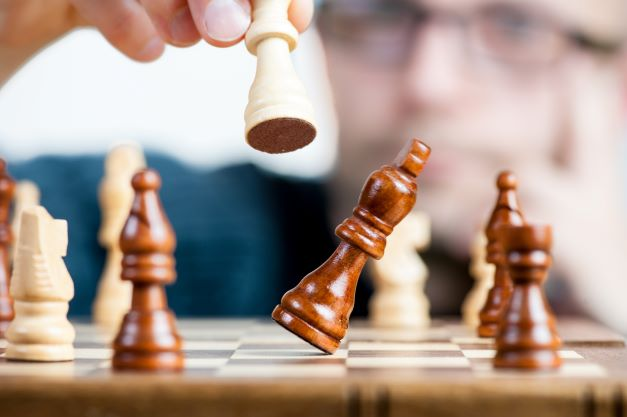

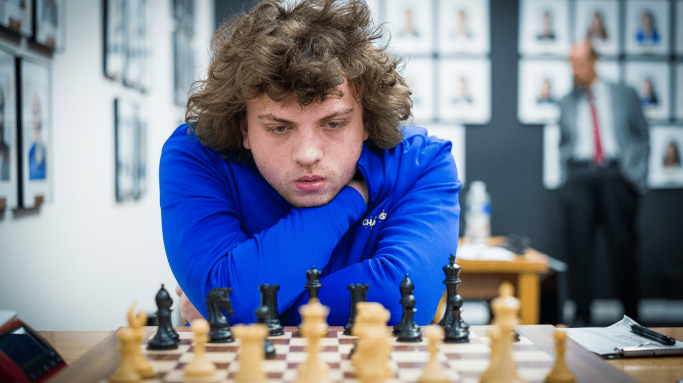

In [2]:
#Choose the player
filterByPlayer = True

# playerName = "akhileshdongre"
# playerName = "Firouzja"
# playerName = "Rausis"
# playerName = "Erigaisi"
# playerName = "Gukesh"

# playerName = "Carlsen"
# playerName = "Caruana"
playerName = "Niemann"

#set the lower limit for starting of the analysis
filterByMinDate = False
minDate = "2018-01-01"
#set the lower limit for starting of the analysis
filterByMaxDate = False
maxDate = "2018-01-01"

#### To extract the pickle files into pandas dataframe 
The games are stored in pgn formats
Text-based file format used to record moves in a chess match; also includes the event name, location, date, round, player names, and result of the game.

In [3]:
# Read the pickle files and save into dataframe
allPickleFiles = []
df = pd.DataFrame()

for file in os.listdir():
    if ".pkl" in file and ".zip" not in file:
        allPickleFiles.append(file)
        
for file in allPickleFiles:
    if(file not in ["your_pickle_file.pkl","Akhilesh_All_games_pickle_file_depth_20 (1).pkl"]):
        
        localDf = pd.read_pickle(file)
        concat = [df, localDf]
        df = pd.concat(concat)
    

In [4]:
allPickleFiles

['10411_games_with_centipawn_metrics.pkl',
 '7568_games_with_centipawn_metrics.pkl',
 'Akhilesh_All_games_pickle_file_depth_20 (1).pkl',
 'your_pickle_file.pkl']

In [7]:
df_eda= df.copy()
df_eda.head()

,Date,Event Name,Event Rounds,Round,White Name,Black Name,Result,White ELO,Black ELO,Moves,White Av CP Loss,Black Av CP Loss,Evaluations List,White CP Loss List,Black CP Loss List,PGN,Analysis Depth,White Expected Rating by ACPL,Black Expected Rating by ACPL
0,2018-03-28,Philadelphia op 12th,9,1,"Niemann, Hans Moke","Oberoi, Shelev",1-0,2302,1924,39,22.0,46.0,"[47, 43, 44, -9, 17, 10, 5, 0, 12, -30, -13, -...","[4, 53, 7, 5, 42, 38, 0, 13, 135, 0, 0, 5, 0, ...","[1, 26, 0, 12, 17, 10, 19, 14, 35, 12, 10, 11,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20,NaN,NaN
0,2018-03-29,Philadelphia op 12th,9,2,"Niemann, Hans Moke","Popilski, Gil",1/2-1/2,2302,2502,36,12.0,13.0,"[46, 36, 46, 35, 50, 36, 62, 47, 59, 38, 57, 5...","[10, 11, 14, 15, 21, 1, 31, 36, 2, 25, 11, 28,...","[10, 15, 26, 12, 19, 6, 54, 13, 18, 17, 12, 10...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20,NaN,NaN
0,2018-03-29,Philadelphia op 12th,9,3,"Gorovets, Andrey","Niemann, Hans Moke",0-1,2496,2302,50,46.0,28.0,"[37, 27, 49, 6, 35, 12, 22, 18, 33, 13, 29, 19...","[10, 43, 23, 4, 20, 10, 12, 3, 9, 24, 10, 49, ...","[22, 29, 10, 15, 16, 0, 0, 41, 16, 7, 0, 73, 1...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20,NaN,NaN
0,2018-03-30,Philadelphia op 12th,9,4,"Tang, Andrew","Niemann, Hans Moke",1-0,2509,2302,38,22.0,38.0,"[46, 26, 40, 37, 96, 67, 151, 114, 138, 125, 1...","[20, 3, 29, 37, 13, 51, 24, 33, 8, 45, 10, 31,...","[14, 59, 84, 24, 37, 42, 19, 36, 1, 50, 37, 0,...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20,NaN,NaN
0,2018-03-30,Philadelphia op 12th,9,5,"Niemann, Hans Moke","Balakrishnan, Praveen",0-1,2302,2405,39,23.0,7.0,"[35, 27, 48, 23, 36, 20, 46, 8, 25, 31, 38, -5...","[8, 25, 16, 38, 0, 92, 6, 0, 1, 2, 0, 7, 0, 30...","[21, 13, 26, 17, 7, 3, 3, 45, 3, 0, 2, 0, 30, ...","[Event ""Philadelphia op 12th""]\n[Site ""Philade...",20,NaN,NaN


### EDA for the games

Seeing the ratio of winners wrt to White or Black in a Game to see any pattern

In [25]:
print(df_eda['Result'].unique())
df_eda[df_eda["Result"].str.contains('/*')==False]
df_eda.loc[df_eda['Result'].str.contains("1-0"),'Winner'] = "White" 
df_eda.loc[df_eda['Result'].str.contains("0-1"),'Winner'] = "Black"
df_eda.loc[df_eda['Result'].str.contains("1/2-1/2"),'Winner'] = "Draw"
df_eda.test.unique()
df_eda = df_eda.dropna(subset=['Winner'])
print(df_eda.test.unique())

['1-0' '1/2-1/2' '0-1']
['White' 'Draw' 'Black']


In [32]:
def winner_column_plot(df):    
    fig=px.pie(df["Winner"].value_counts(),names=df["Winner"].value_counts().index,values=df["Winner"].value_counts().values,
               title="Percentage of Winners",
                color_discrete_sequence=[" #3498DB","#FDFEFE","#17202A"],
               labels={"names":"Player","values":"Num of Games"}
          )
    fig.update_layout(
    title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.45,font_color="#bbb",
        plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
        legend_title_text="Game winner")
    fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
    fig.update_xaxes(tickfont_size=9)
    fig.update_traces(textfont_size=10)
    fig.show()
winner_column_plot(df_eda)    

### White win % is 36%
### Black win % is 24%
### Draw % is 40%
* Higher level players keep the first move advantage i.e. (White player wins) or mostly draws the game.
* Certain openings keep the games balanced and have a drawn outcome at any point at GM level game.

#### Data preprocessing and Cleaning 

In [5]:
df.drop_duplicates(subset=['Date', 'Event Name','Round', 'White Name',
       'Black Name', 'Result', 'White ELO', 'Black ELO',
       'White Av CP Loss', 'Black Av CP Loss', 'Analysis Depth'], inplace=True)


df = df.dropna(subset=['White Name'], axis=0)
df = df.dropna(subset=['Black Name'], axis=0)
df = df.dropna(subset=['White ELO'], axis=0)
df = df.dropna(subset=['Black ELO'], axis=0)
df['White ELO'] = df['White ELO'].apply(lambda x: int(x))
df['Black ELO'] = df['Black ELO'].apply(lambda x: int(x))
df['Moves'] = df['Moves'].apply(lambda x: int(x))
df['White Av CP Loss'] = df['White Av CP Loss'].apply(lambda x: float(x))
df['Black Av CP Loss'] = df['Black Av CP Loss'].apply(lambda x: float(x))
df['Analysis Depth'] = df['Analysis Depth'].apply(lambda x: int(x))
df['Date'] = df['Date'].apply(lambda x: str(x).replace(".", "-").replace("??", "01")[:10])
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))


# Filter by Player
if filterByPlayer == True:
    df1 = df[df['White Name'].str.contains(playerName)].copy()
    df2 = df[df['Black Name'].str.contains(playerName)].copy()
    df = pd.concat([df1, df2])
    df.reset_index(inplace=True, drop=True)
    


#### Selecting the file path to save plots 

In [47]:
image_save_path="./Player_wise_images/Niemann/"

#### Correlation of players , and linear regression plot which predicts the trend.
A linear regression prediction line also helps us understand how the trend for the line should have been.
Binning the Ratings into range values and analysing the correlation with top moves 

                     Rating  Av CP Loss  Std. Dev. CP Loss
Rating             1.000000   -0.981435          -0.946644
Av CP Loss        -0.981435    1.000000           0.983299
Std. Dev. CP Loss -0.946644    0.983299           1.000000


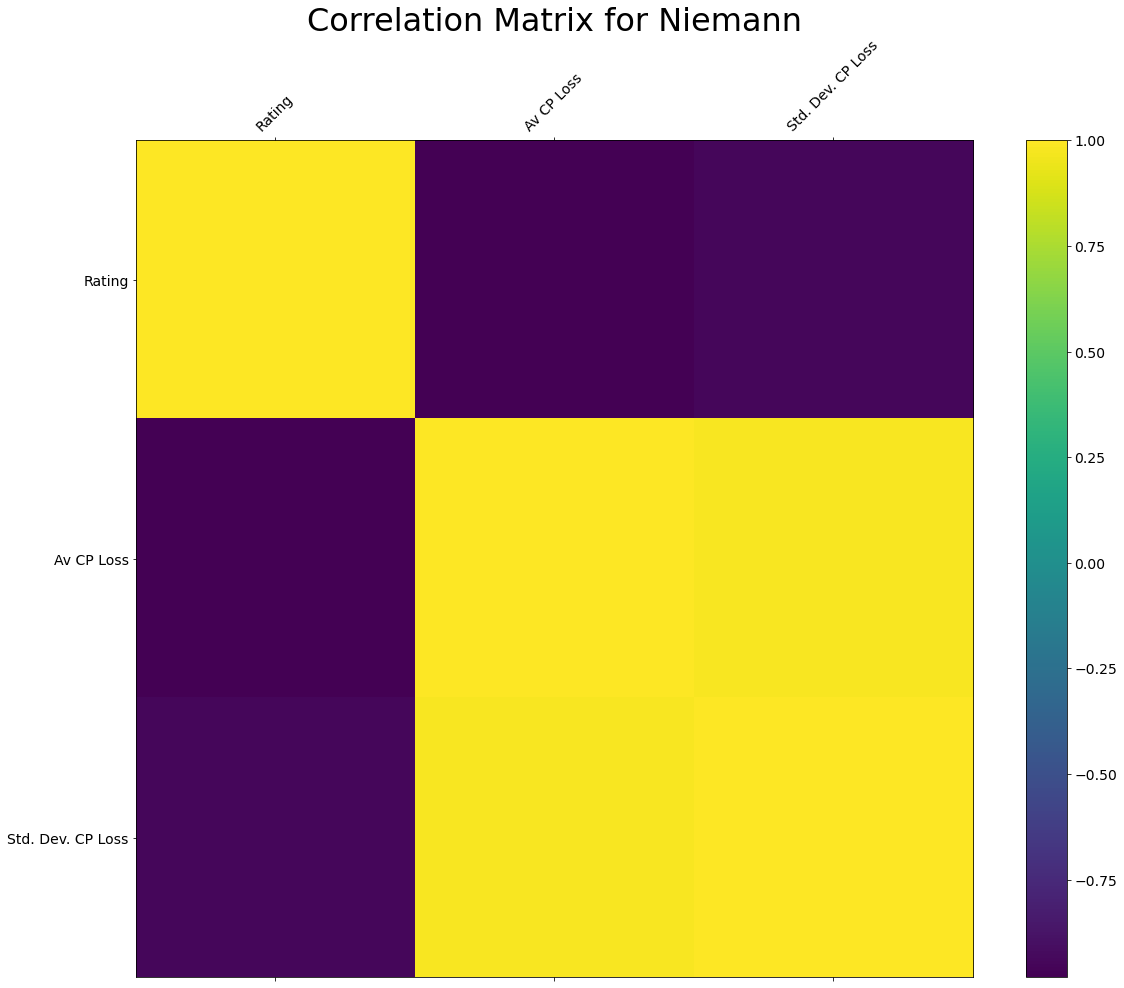

<Figure size 432x288 with 0 Axes>

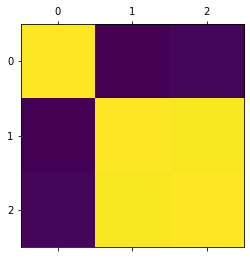

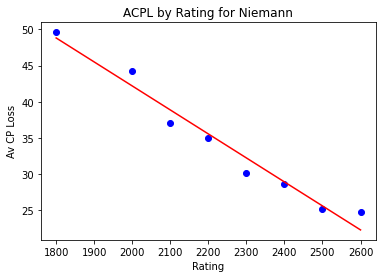

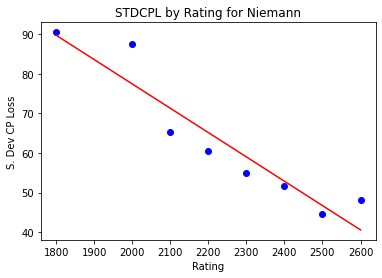

           Rating  Av CP Loss  Std. Dev. CP Loss  Games
Tier                                                   
1800  1831.695652   49.594535          90.539046     23
2000  2036.463415   44.217191          87.491191     41
2100  2160.441176   37.065492          65.219249     34
2200  2280.236220   35.032510          60.527566    127
2300  2318.081633   30.107264          54.854929     49
2400  2460.072727   28.577430          51.665092    165
2500  2532.155738   25.139281          44.564718    122
2600  2644.085561   24.701141          48.070761    187


<Figure size 432x288 with 0 Axes>

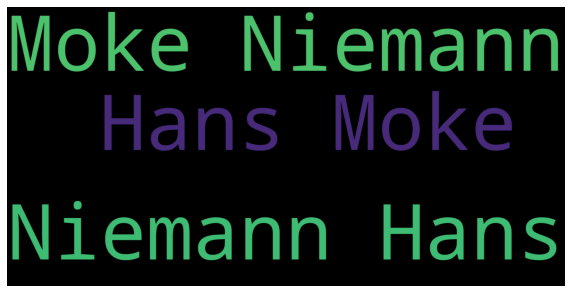

In [48]:
# Filter by min date
if filterByMinDate == True:
    df = df.query('Date >= "' + minDate + '"').copy()

if filterByMaxDate == True:
    df = df.query('Date < "' + minDate + '"').copy()


df.reset_index(inplace=True, drop=True)

whiteRatingDf = pd.DataFrame(columns=['Player', 'Rating', 'CP Loss List', 'Av CP Loss', 'Std. Dev. CP Loss'])
blackRatingDf = pd.DataFrame(columns=['Player', 'Rating', 'CP Loss List', 'Av CP Loss', 'Std. Dev. CP Loss'])

whiteRatingDf['Rating'] = df['White ELO'].copy()
whiteRatingDf['CP Loss List'] = df['White CP Loss List'].copy()
whiteRatingDf['Player'] = df['White Name'].copy()
blackRatingDf['Rating'] = df['Black ELO'].copy()
blackRatingDf['CP Loss List'] = df['Black CP Loss List'].copy()
blackRatingDf['Player'] = df['Black Name'].copy()

correlationDf = pd.concat([whiteRatingDf, blackRatingDf])

# Remove empty players
correlationDf = correlationDf.dropna(subset=['Player'], axis=0)
# Remove cheater Igor Rausis
if "rausis" not in playerName.lower():
    correlationDf = correlationDf[~correlationDf['Player'].str.contains("Rausis")].copy()
# Remove Niemann to be on the safe side
if "niemann" not in playerName.lower():
    correlationDf = correlationDf[~correlationDf['Player'].str.contains("Niemann")].copy()
# Filter by Player
if filterByPlayer == True:
    correlationDf = correlationDf[correlationDf['Player'].str.contains(playerName)].copy()

correlationDf.reset_index(inplace=True, drop=True)
correlationDf['Av CP Loss'] = correlationDf['CP Loss List'].apply(lambda x: np.mean(x))
correlationDf['Std. Dev. CP Loss'] = correlationDf['CP Loss List'].apply(lambda x: np.std(x))
correlationDf.dropna(inplace=True)
correlationDf['Rating'] = correlationDf['Rating'].apply(lambda x: int(x))
correlationDf.reset_index(inplace=True, drop=True)

# Classify rating in tiers

d = {
    range(600, 700): 600,
    range(700, 800): 700,
    range(800, 900): 800,
    range(900, 1000): 900,
    range(1000, 1100): 1000,
    range(1100, 1200): 1100,
    range(1200, 1300): 1200,
    range(1300, 1400): 1300,
    
     range(1400, 1500): 1400,
     range(1500, 1600): 1500,
     range(1600, 1700): 1600,
     range(1700, 1800): 1700,
     range(1800, 1900): 1800,
     range(1900, 2000): 1900,
     range(2000, 2100): 2000,
     range(2100, 2200): 2100,
     range(2200, 2300): 2200, 
     range(2300, 2400): 2300, 
     range(2400, 2500): 2400, 
     range(2500, 2600): 2500, 
     range(2600, 2700): 2600,
     range(2700, 2800): 2700,
     range(2800, 2900): 2800
     }
correlationDf['Tier'] = correlationDf['Rating'].apply(lambda x: next((v for k, v in d.items() if x in k), 0))
correlationDf['Games'] = 1

groupedCorrelationDf = correlationDf.groupby('Tier').agg({'Rating': np.mean, 'Av CP Loss': np.mean, 'Std. Dev. CP Loss': np.mean, 'Games': np.sum})
#groupedCorrelationDf = groupedCorrelationDf[groupedCorrelationDf['Rating'] >=2200] # Uncomment this line in case you want to look only after 2200 and get more consistent data
groupedCorrelationDf = groupedCorrelationDf[groupedCorrelationDf['Games'] >=10] # Stattistical relevance
groupedCorrelationDf = groupedCorrelationDf[groupedCorrelationDf.index > 0]
print(groupedCorrelationDf[['Rating', 'Av CP Loss', 'Std. Dev. CP Loss']].corr(method='pearson'))
dfToPlot = groupedCorrelationDf[['Rating', 'Av CP Loss', 'Std. Dev. CP Loss']].copy()
# First Plot for correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(dfToPlot.corr(method='pearson'), fignum=f.number)
plt.xticks(range(dfToPlot.select_dtypes(['number']).shape[1]), dfToPlot.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(dfToPlot.select_dtypes(['number']).shape[1]), dfToPlot.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for '+str(playerName) , fontsize=32);
plt.savefig(str(image_save_path)+"1st_plot.jpg")
plt.show()

plt.clf()

#2nd Plot for correlation
plt.matshow(dfToPlot.corr(method='pearson'))
plt.savefig(str(image_save_path)+"2nd_plot.jpg")
plt.show()


# Rating x ACPL Linear Regression
dfToPlot
X = dfToPlot.index.values.reshape(-1, 1)
y = dfToPlot.iloc[:, 1:2].values


# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()  
lin.fit(X, y)

# Visualising the Linear Regression results
# 3rd Plot ACPL
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin.predict(X), color = 'red')
plt.title('ACPL by Rating for '+str(playerName))
plt.xlabel('Rating')
plt.ylabel('Av CP Loss')
plt.savefig(str(image_save_path)+"3rd_plot.jpg",dpi=160)
plt.show()
plt.clf()


# Rating x STDCPL Loss Linear Regression


dfToPlot
X = dfToPlot.index.values.reshape(-1, 1)
y = dfToPlot.iloc[:, 2:3].values

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin2 = LinearRegression()  
lin2.fit(X, y)

# Visualising the Linear Regression results
#4th Plot
plt.scatter(X, y, color = 'blue')
plt.plot(X, lin2.predict(X), color = 'red')
plt.title('STDCPL by Rating for '+str(playerName))
plt.xlabel('Rating')
plt.ylabel('S. Dev CP Loss')
plt.savefig(str(image_save_path)+"4th_plot.jpg",dpi=160)
plt.show()
plt.clf()



summary = correlationDf['Player'].copy()

all_summary = " ".join(s for s in summary)
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
wordcloud.to_file(str(image_save_path)+"Wordcloud.png")
print(groupedCorrelationDf)




## References
1. [Reference for ACPL](https://github.com/lichess-org/lila/discussions/8867)
2. [ACPL Algorithm](https://github.com/captflint/centipawnloss)
3. [ACPL explaination](https://chessquestions.com/centipawn-loss-in-chess/)
4. [StockFish Guide](https://www.chessjournal.com/stockfish/)
5. [StockFish Git Help](https://github.com/official-stockfish/Stockfish)

### Conclusion : Saved the result images for each player


Copyright 2022 *Akhilesh Dongre*, *Jatin Madan*, *Sreya Vallabhaneni*

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.